In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

# 1. Загрузка и предобработка данных

In [18]:
episodes_df = pd.read_csv('game_of_thrones_episodes.csv', parse_dates=['original_air_date'])
imdb_df = pd.read_csv('game_of_thrones_imdb.csv', parse_dates=['original_air_date'])
episode_df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,2011-05-08,2450000.0
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0


In [19]:
imdb_df.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Winter Is Coming,2011-04-17,9.0,46180,Eddard Stark is torn between his family and an...
1,1,2,The Kingsroad,2011-04-24,8.6,35052,"While Bran recovers from his fall, Ned takes o..."
2,1,3,Lord Snow,2011-05-01,8.5,33200,Jon begins his training with the Night's Watch...
3,1,4,"Cripples, Bastards, and Broken Things",2011-05-08,8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...
4,1,5,The Wolf and the Lion,2011-05-15,9.0,32818,Catelyn has captured Tyrion and plans to bring...


In [20]:
# Оставим только соответствующие столбцы из набора данных IMDb, чтобы избежать дублирования.
imdb_df = imdb_df[['title', 'original_air_date', 'imdb_rating', 'total_votes', 'desc']]
game_of_thrones_df = episodes_df.merge(imdb_df, how='left', on=['title', 'original_air_date'])
game_of_thrones_df.shape

(73, 11)

In [21]:
game_of_thrones_df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers,imdb_rating,total_votes,desc
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0,9.0,46180,Eddard Stark is torn between his family and an...
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0,8.6,35052,"While Bran recovers from his fall, Ned takes o..."
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0,8.5,33200,Jon begins his training with the Night's Watch...
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,2011-05-08,2450000.0,8.6,31558,Eddard investigates Jon Arryn's murder. Jon be...
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0,9.0,32818,Catelyn has captured Tyrion and plans to bring...


# 2. У каких серий и сезонов больше всего зрителей в США?

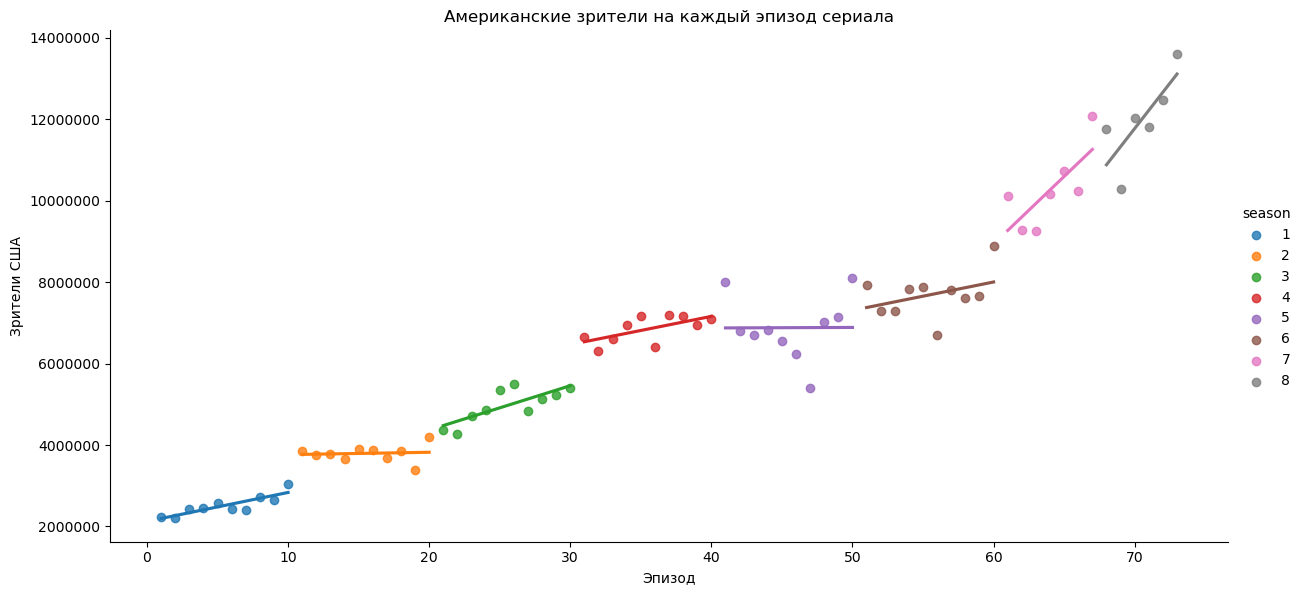

In [9]:
sns.lmplot(x='episode_num_overall', y='us_viewers', hue='season', data=game_of_thrones_df, height=6, aspect=2, ci=None)
plt.xlabel('Эпизод')
plt.ylabel('Зрители США')
plt.title('Американские зрители на каждый эпизод сериала')
plt.ticklabel_format(style='plain', axis='y')

Text(0.5, 1.0, 'Среднее количество зрителей сериала «Игра престолов» в США за сезон')

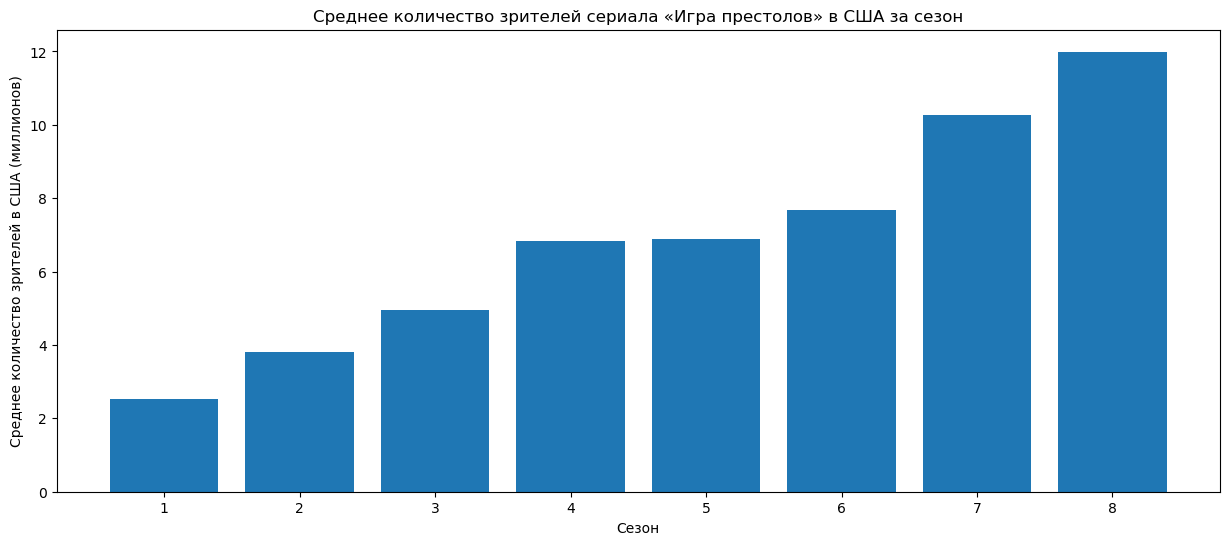

In [10]:
mean_viewers = game_of_thrones_df.groupby(['season'])['us_viewers'].mean()

fig = plt.figure(figsize=(15, 6))
plt.bar(x=mean_viewers.index, height=(mean_viewers.values / 1e6))
plt.ylabel('Среднее количество зрителей в США (миллионов)')
plt.xlabel('Сезон')
plt.title('Среднее количество зрителей сериала «Игра престолов» в США за сезон')

## По результатам проведенного анализа данных, можно сделать вывод, что аудитория постоянно росла на протяжении всего показа. "Игра престолов" стал самым популярным сериалом

# 3. Какие сезоны имеют самые высокие рейтинги IMDb?

Text(0.5, 1.0, 'Рейтинг IMDb для серий «Игры престолов»')

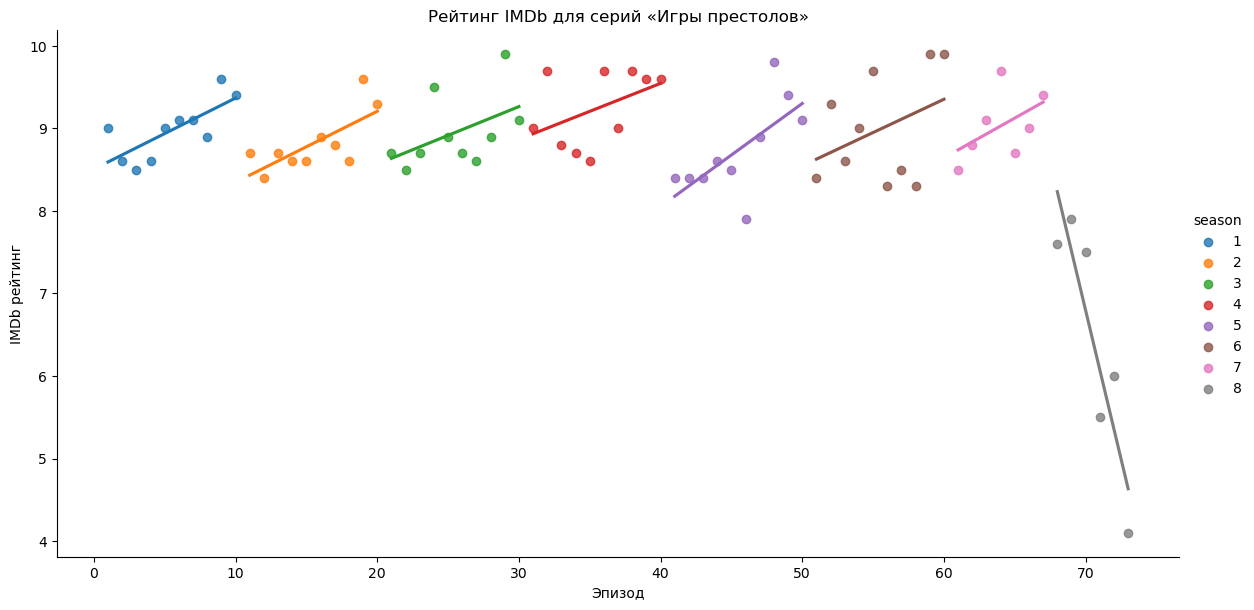

In [23]:
sns.lmplot(x='episode_num_overall', y='imdb_rating', hue='season', data=game_of_thrones_df, height=6, aspect=2, ci=None)
plt.xlabel('Эпизод')
plt.ylabel('IMDb рейтинг')
plt.title('Рейтинг IMDb для серий «Игры престолов»')

## По данным анализа можно предположить, что на протяжении всего показа сериал имел сильные и стабильные рейтинги. Однако зрители негативно отреагировали на последний сезон

# 4. Какие серии получили наибольшее количество голосов на IMDb?

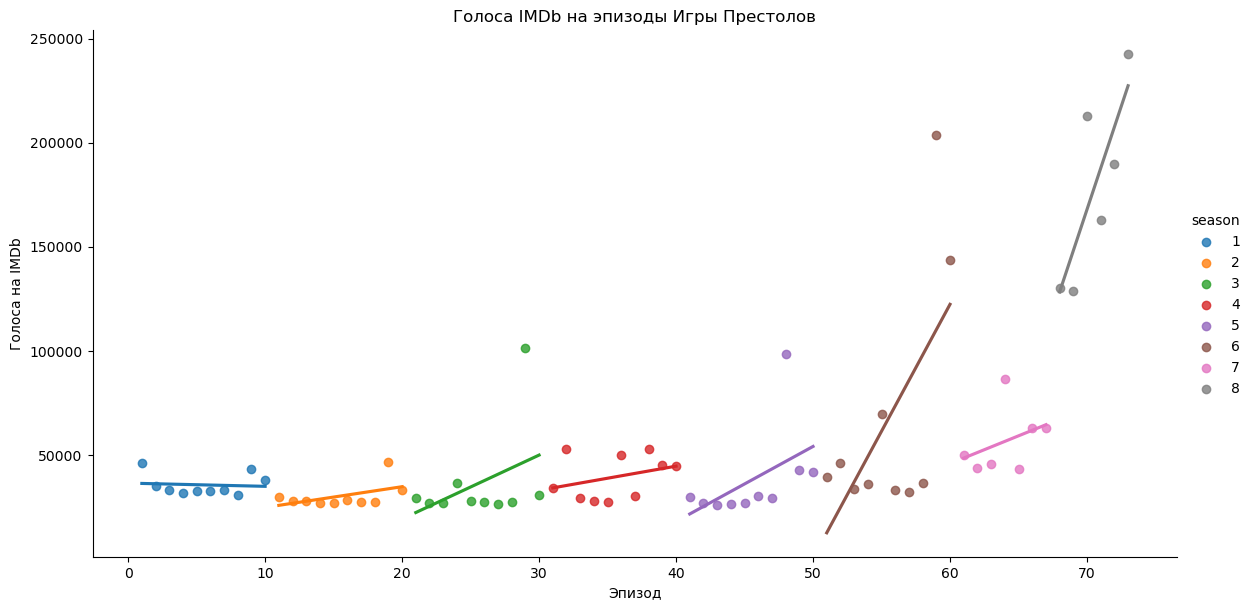

In [24]:
sns.lmplot(x="episode_num_overall", y="total_votes", hue="season", data=game_of_thrones_df, height=6, aspect=2, ci=None)
plt.xlabel("Эпизод")
plt.ylabel("Голоса на IMDb")
plt.title("Голоса IMDb на эпизоды Игры Престолов")
plt.ticklabel_format(style='plain', axis='y')

## На графике видно, что сериал в среднем получал 50000 оценок за серию, но эпизоды последнего сезона получили в несколько 

# 5. Кто написал и снял больше всего эпизодов?

<Axes: title={'center': 'Топ писателей по количеству эпизодов'}>

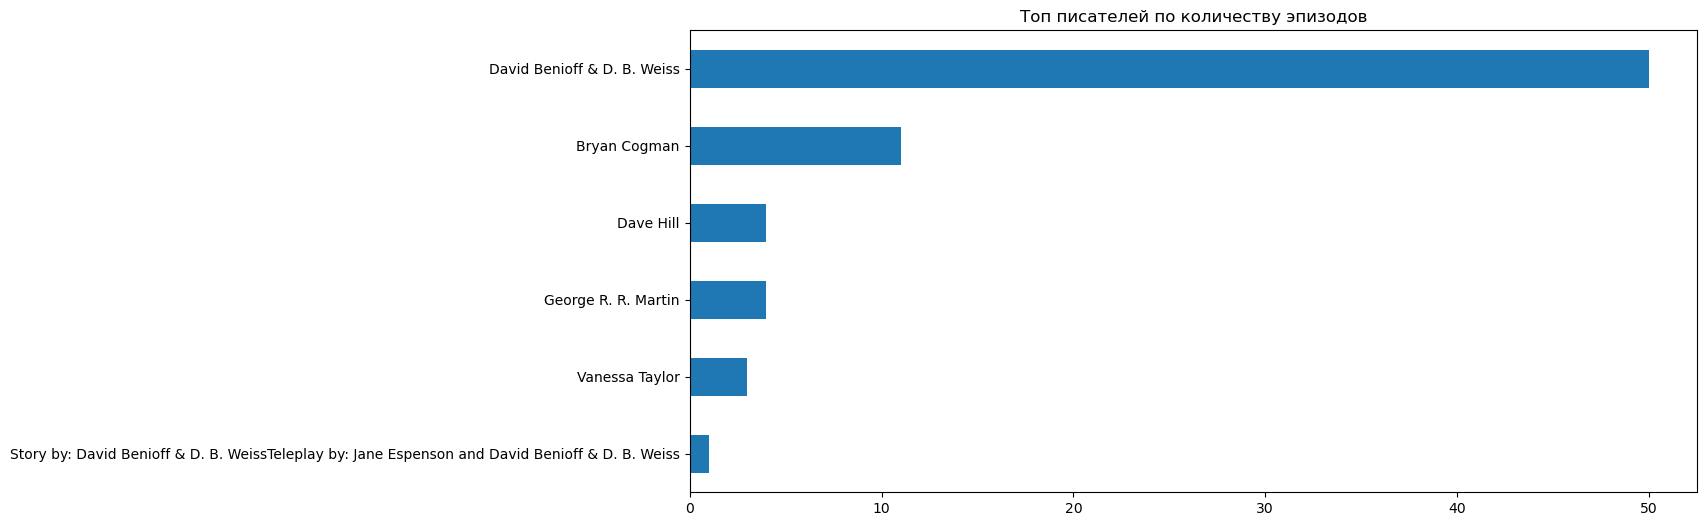

In [25]:
title_text = "Топ писателей по количеству эпизодов"
game_of_thrones_df['written_by'].value_counts().head(10).sort_values().plot.barh(figsize=(13, 6), title=title_text)

<Axes: title={'center': 'Топ режиссеров по количеству эпизодов'}>

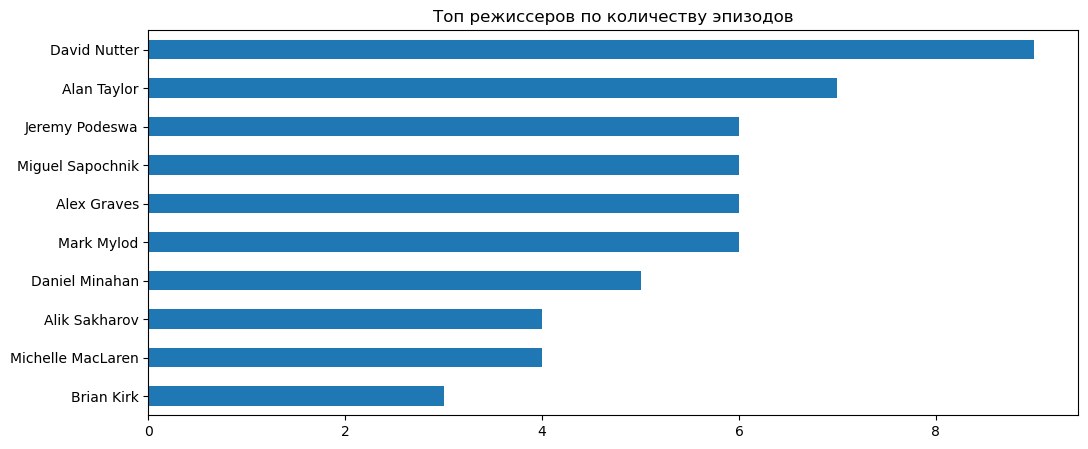

In [26]:
title_text = "Топ режиссеров по количеству эпизодов"
game_of_thrones_df['directed_by'].value_counts().head(10).sort_values().plot.barh(figsize=(12, 5), title=title_text)

## Создатели сериала Дэвид Бениофф и Д. Б. Вайс написали большинство эпизодов «Игры престолов», а Дэвид Наттер снял большинство эпизодов.

# 6. Кто главные персонажи в Игре Престолов?

## Книги Джорджа Р. Р. Мартина «Песнь Льда и Пламени» и сериалы, основанные на них, известны тем, что в них огромное количество персонажей. Давайте посмотрим, сможем ли мы просмотреть описания эпизодов, чтобы увидеть, кто на самом деле главные герои, исходя из того, сколько раз упоминается каждый человек.

In [27]:
# Исправим некоторые описания, так как у некоторых персонажей несколько имен
game_of_thrones_df['desc'] = game_of_thrones_df['desc'].str.replace('Eddard', 'Ned')
game_of_thrones_df['desc'] = game_of_thrones_df['desc'].str.replace('Sandor Clegane', 'The Hound')

character_names = ['Ned', 'Robert', 'Jaime', 'Catelyn', 'Cersei', 'Daenerys', 'Jorah', 'Viserys',
                   'Jon', 'Robb', 'Sansa', 'Arya', 'Theon', 'Bran', 'Joffrey', 'The Hound', 'Tyrion',
                   'Drogo', 'Littlefinger', 'Davos', 'Samwell', 'Stannis', 'Melisandre', 'Bronn',
                   'Varys', 'Shae', 'Margaery', 'Tywin', 'Talisa', 'Ygritte', 'Gendry', 'Tormund',
                   'Brienne', 'Ramsay', 'Gilly', 'Daario', 'Missandei', 'Tommen', 'Ellaria', 'Jaqen',
                   'High Sparrow', 'Grey Worm', 'Hodor']

for char_name in character_names:
    game_of_thrones_df[char_name] = np.where(game_of_thrones_df['desc'].str.contains(char_name), 1, 0)
    
game_of_thrones_df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers,imdb_rating,total_votes,...,Ramsay,Gilly,Daario,Missandei,Tommen,Ellaria,Jaqen,High Sparrow,Grey Worm,Hodor
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-17,2220000.0,9.0,46180,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,2011-04-24,2200000.0,8.6,35052,...,0,0,0,0,0,0,0,0,0,0
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,2011-05-01,2440000.0,8.5,33200,...,0,0,0,0,0,0,0,0,0,0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,2011-05-08,2450000.0,8.6,31558,...,0,0,0,0,0,0,0,0,0,0
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,2011-05-15,2580000.0,9.0,32818,...,0,0,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Упоминания персонажей «Игры престолов» в описаниях эпизодов'}>

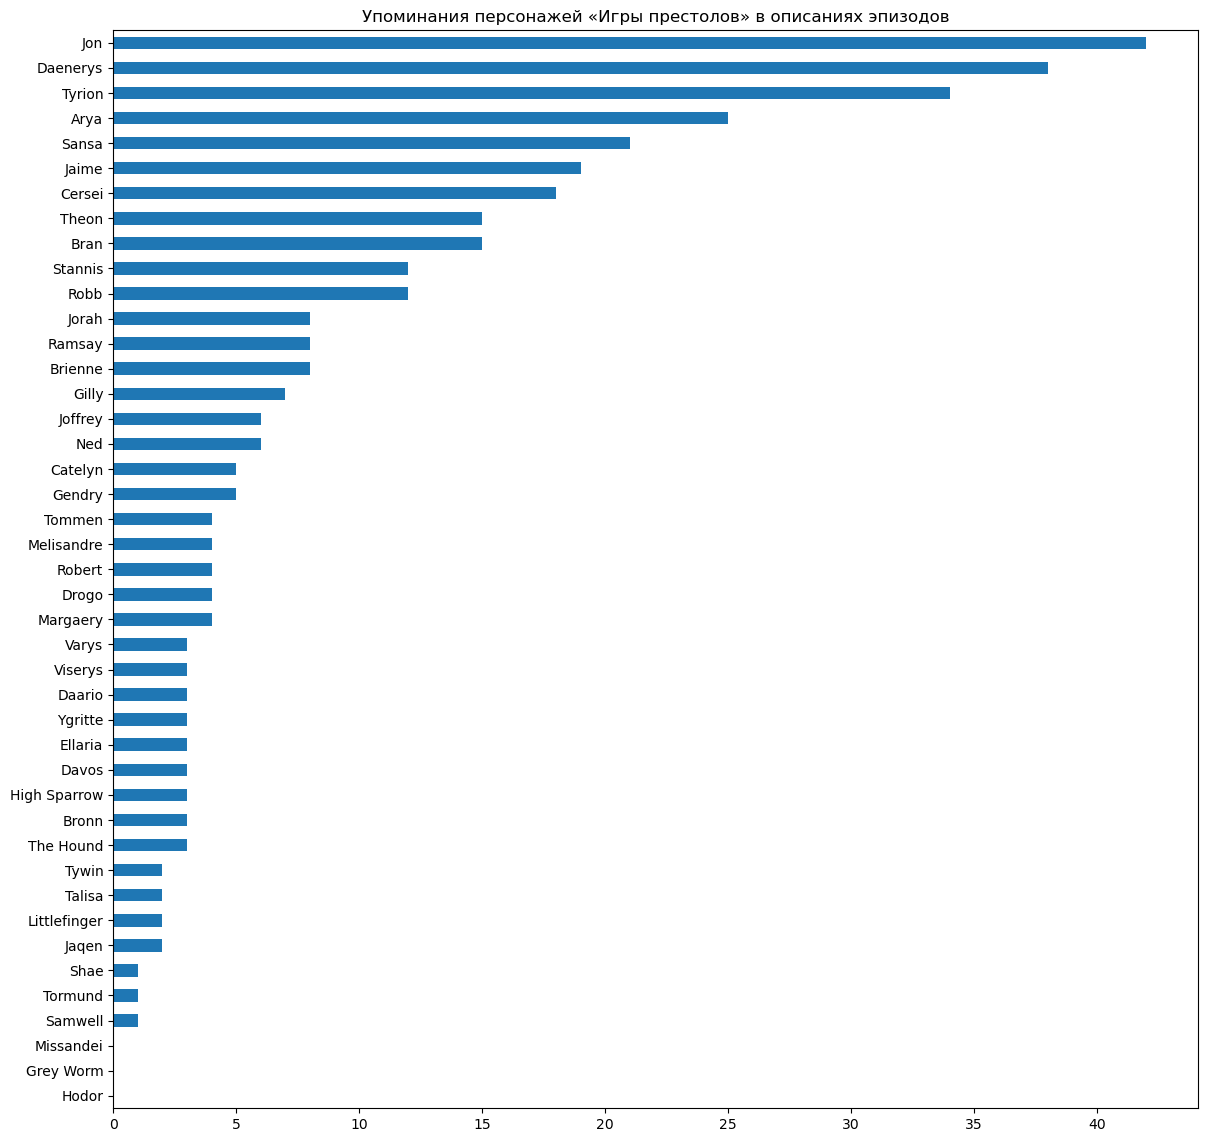

In [28]:
series_stars = game_of_thrones_df[character_names].sum().sort_values()
series_stars.plot.barh(figsize=(14, 14),
                       title='Упоминания персонажей «Игры престолов» в описаниях эпизодов')

### Судя по упоминаниям в описаниях эпизодов, Джон Сноу, Дейенерис и Тирион являются главными героями «Игры престолов», за ними следуют Арья и Санса Старк, а также Джейме и Серсея Ланнистер. Обратите внимание, что персонажи, находящиеся ближе к началу этого списка, — это те, кто был представлен в начале шоу, а также дожил до (почти) самого конца. Давайте посмотрим, как меняются главные герои на протяжении всего сериала.

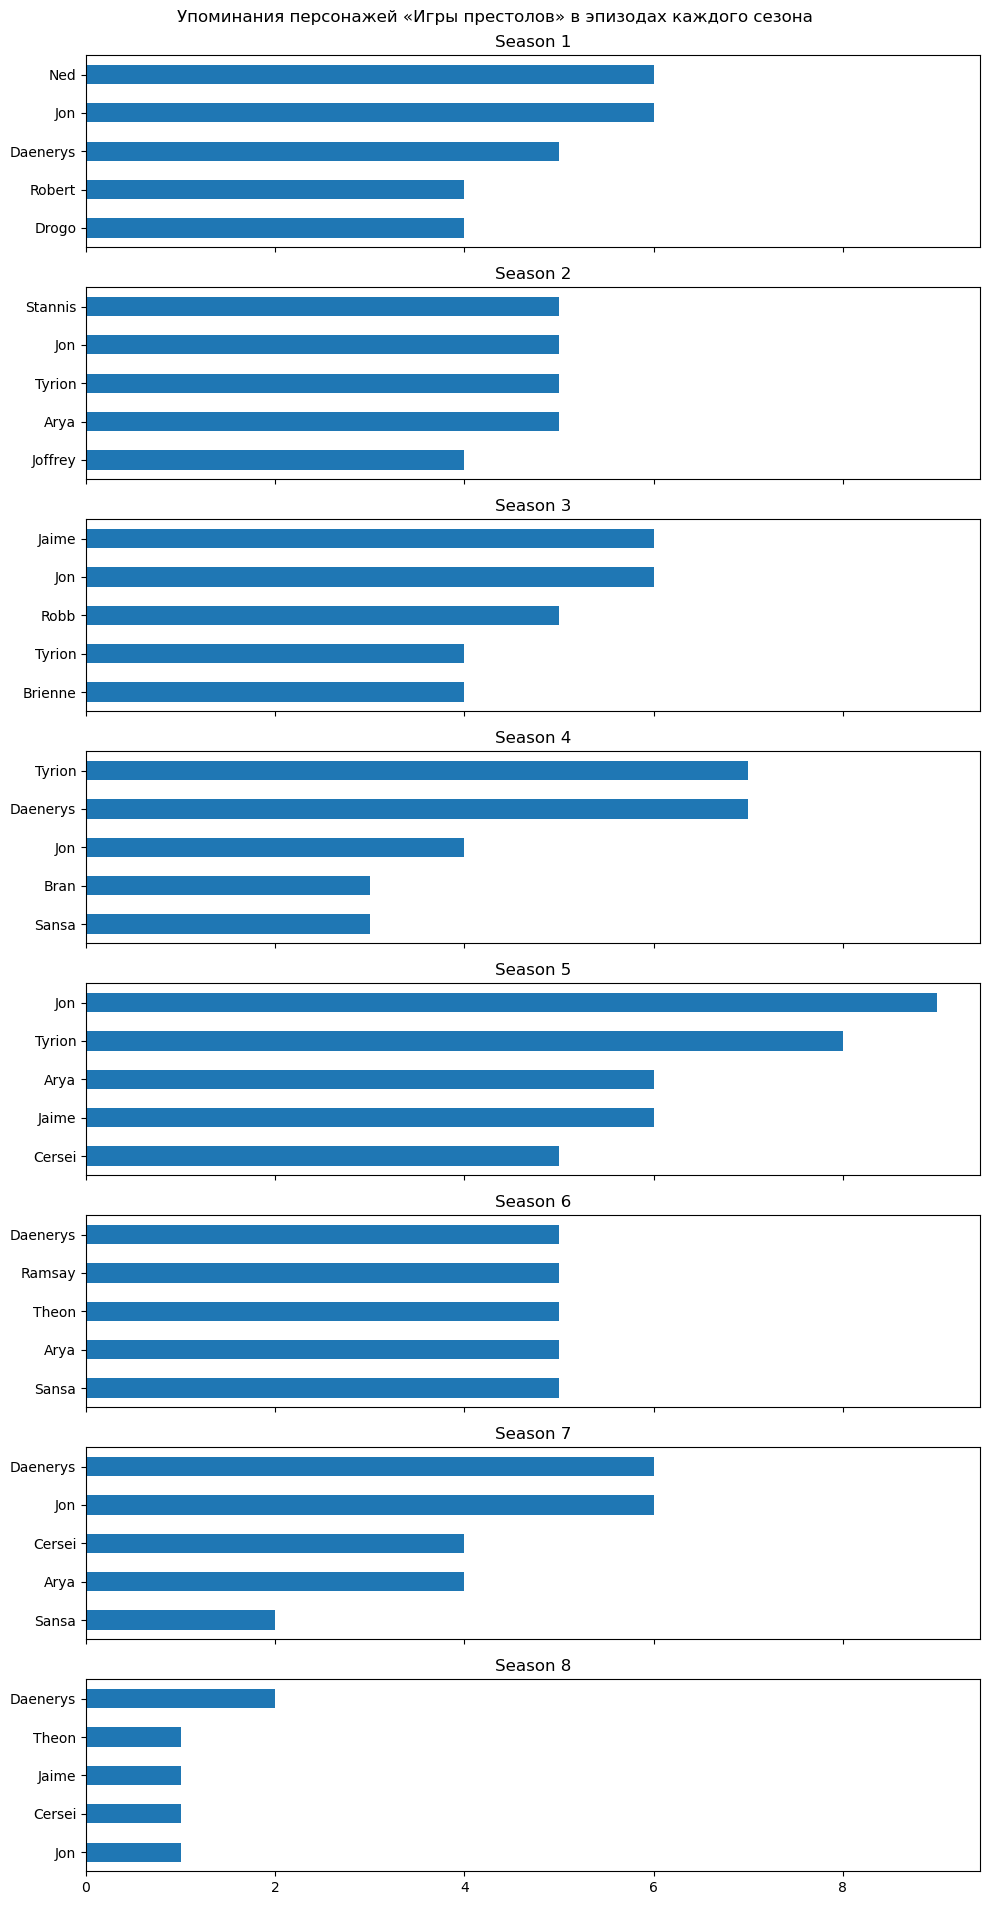

In [29]:
fig, axes = plt.subplots(8, 1, figsize=(10, 20), sharex=True)

for s in range(1, 9):
    gb = game_of_thrones_df[['season'] + character_names].groupby('season').sum()
    season_stars = gb.T[s].sort_values().tail(5) # top 5 characters in each season
    season_stars.plot.barh(ax=axes[s-1], title='Season ' + str(s))

    fig.suptitle("Упоминания персонажей «Игры престолов» в эпизодах каждого сезона")
fig.tight_layout(rect=[0, 0.03, 1.0, 0.99])

### Как и ожидалось, по мере того, как персонажи умирают в более ранних сезонах, их имена перестают появляться в описаниях эпизодов. Другие персонажи становятся все более заметными по мере того, как на них сосредотачивается больше эпизодов.